In [2]:
import pandas as pd

class WeatherData():
    def __init__(self, filename):
        self.data = pd.read_csv(filename)
        self.data = self.data.drop(columns=['GUST', 'SNDP', 'STP'])
        self.data = self.data.replace(999.9, pd.NA)
        self.data = self.data.replace(9999.9, pd.NA)
        self.data['PRCP'] = self.data['PRCP'].replace(99.99, pd.NA)
        self.data = self.data.ffill()


In [3]:
bohol_data = WeatherData('3968119.csv')

print(bohol_data.data.head())
print(max(bohol_data.data['PRCP']))


       STATION        DATE  DEWP  FRSHTT   MAX   MIN  MXSPD  PRCP     SLP  \
0  98222099999  2001-01-09  74.9       0  86.9  77.7    5.8   0.0  1010.5   
1  98222099999  2001-01-10  74.6       0  88.2  73.4    3.9   0.0  1009.8   
2  98222099999  2001-01-11  72.2   10000  85.6  74.5    7.8   0.0  1011.0   
3  98222099999  2001-01-12  72.7       0  90.0  60.1    3.9   0.0  1011.6   
4  98222099999  2001-01-13  69.4       0  84.7  71.2   15.5   0.0  1012.1   

   TEMP  VISIB  WDSP  
0  81.5   15.1   2.7  
1  81.6   15.2   2.4  
2  79.5   15.5   4.4  
3  79.8   15.5   1.9  
4  77.8   13.8   8.6  
15.39


/tmp/ipykernel_21687/2947496543.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data = self.data.ffill()


<Axes: title={'center': 'Sea Level Pressure in Bohol'}, xlabel='DATE'>

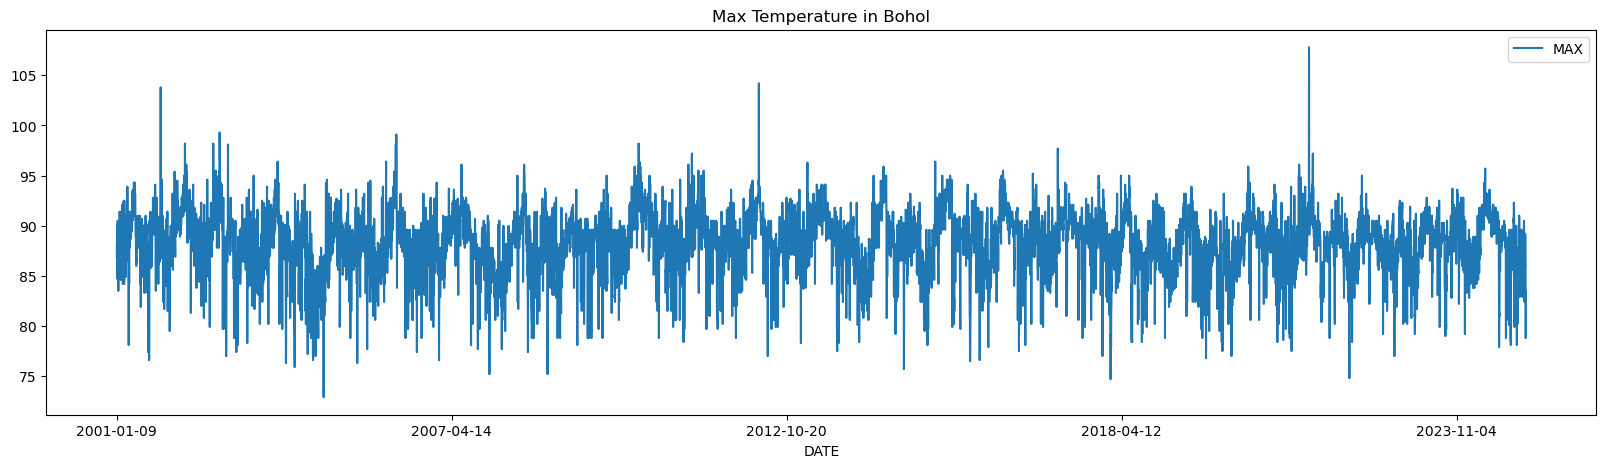

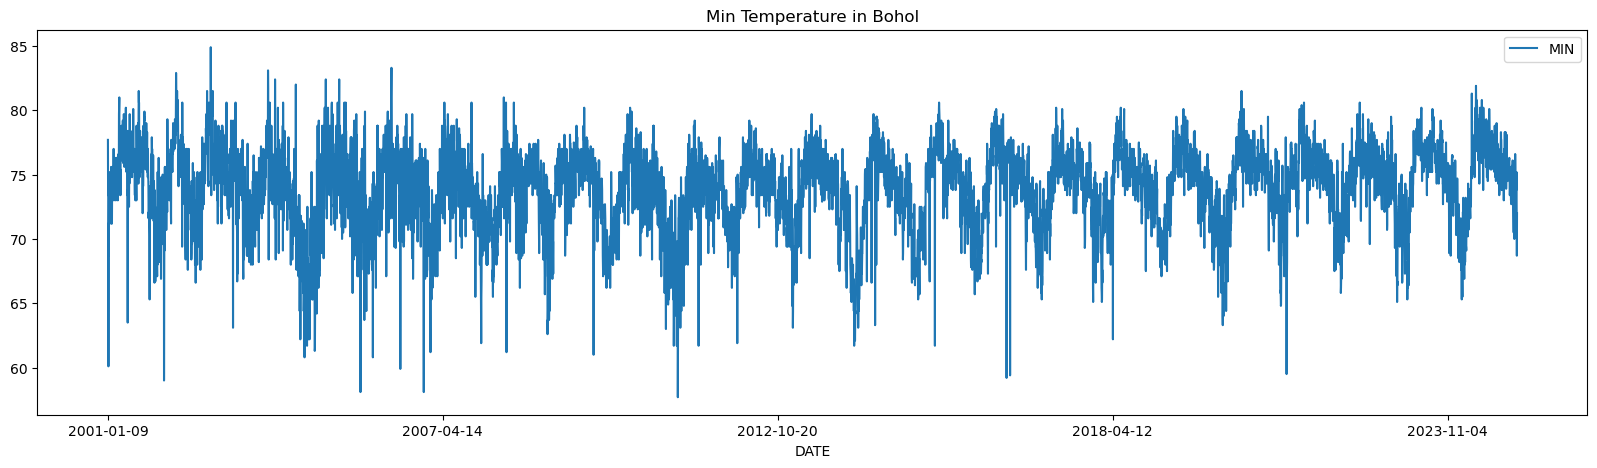

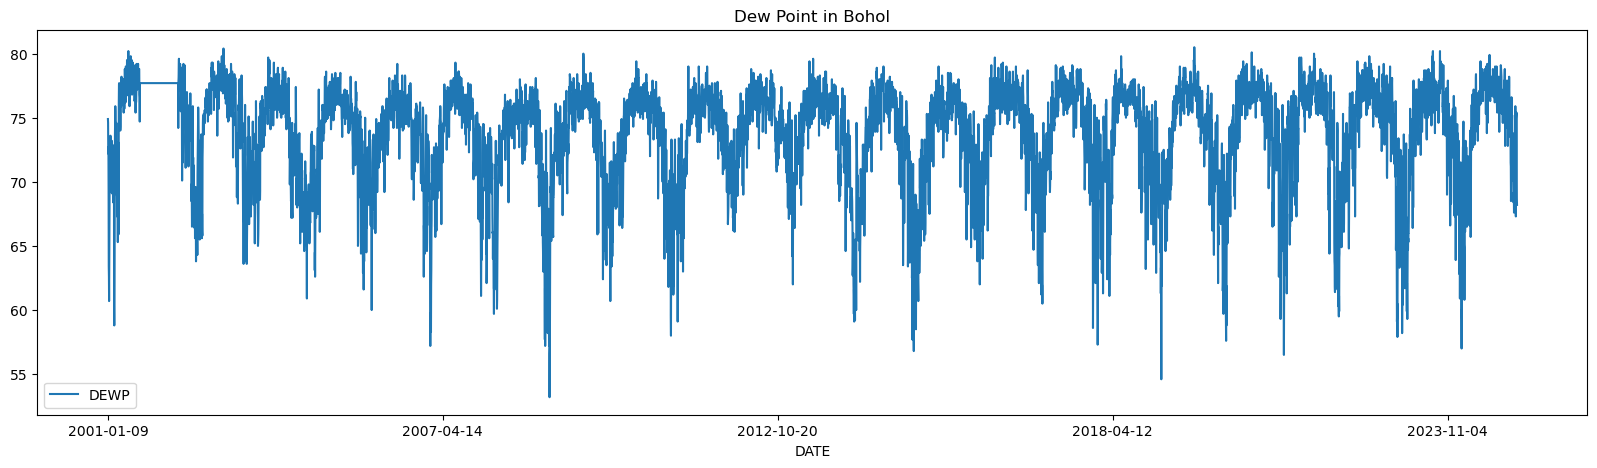

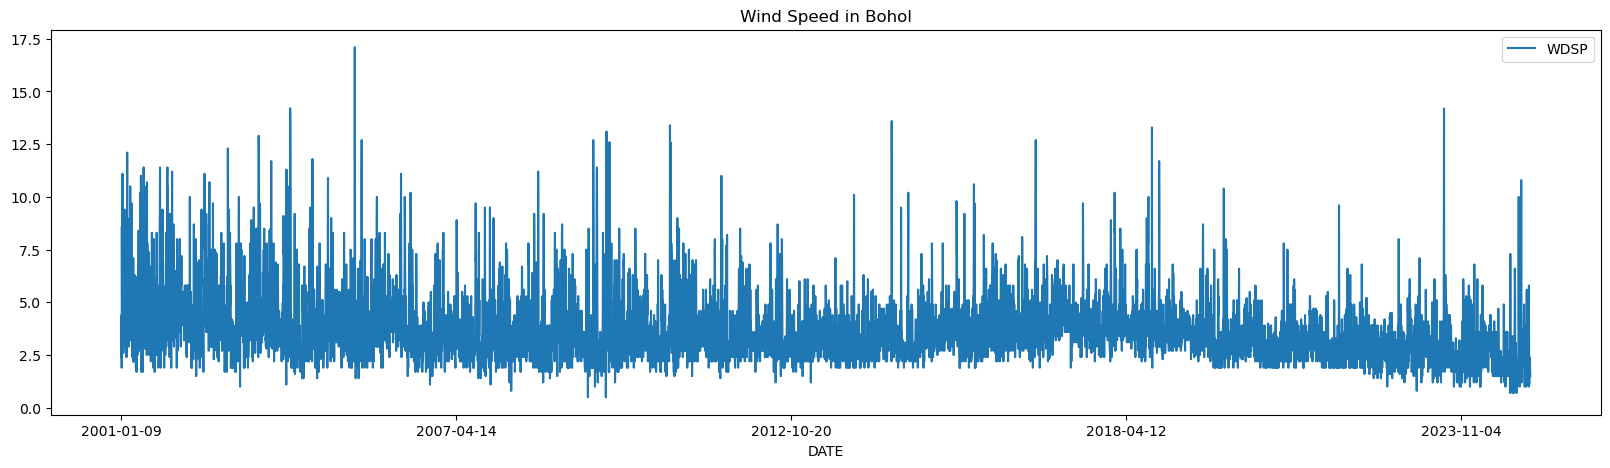

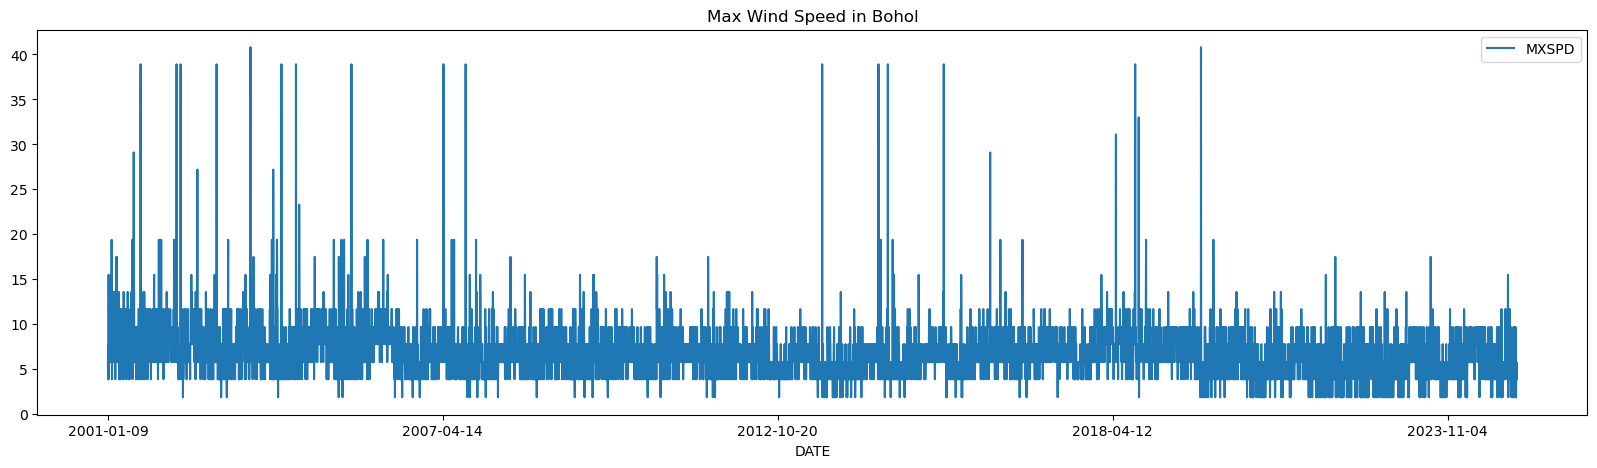

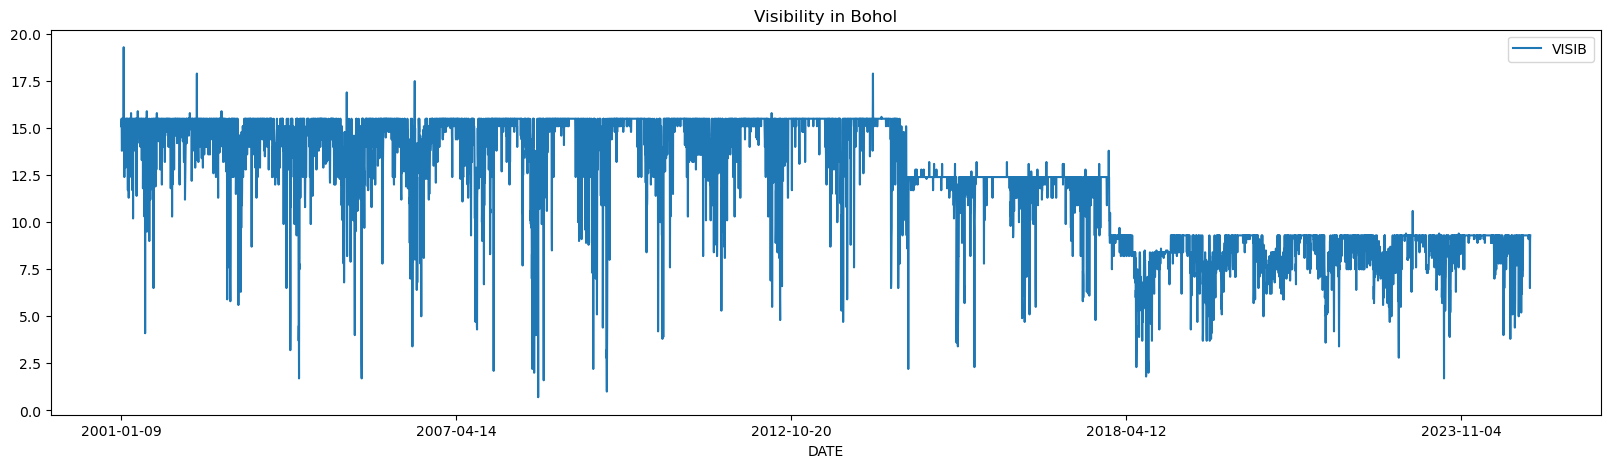

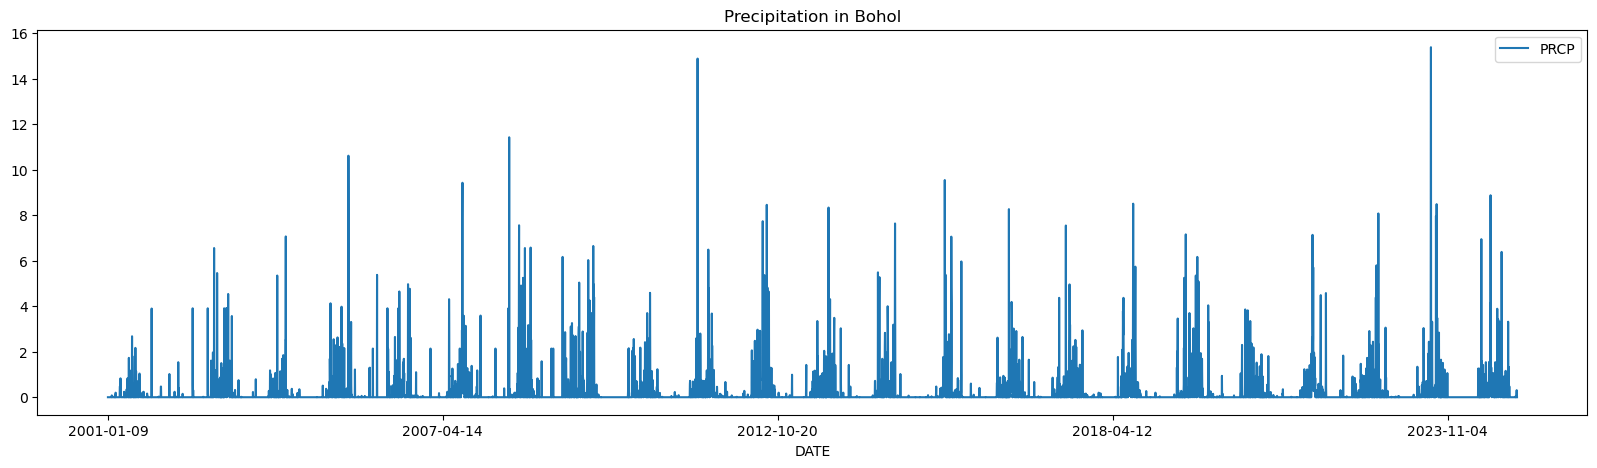

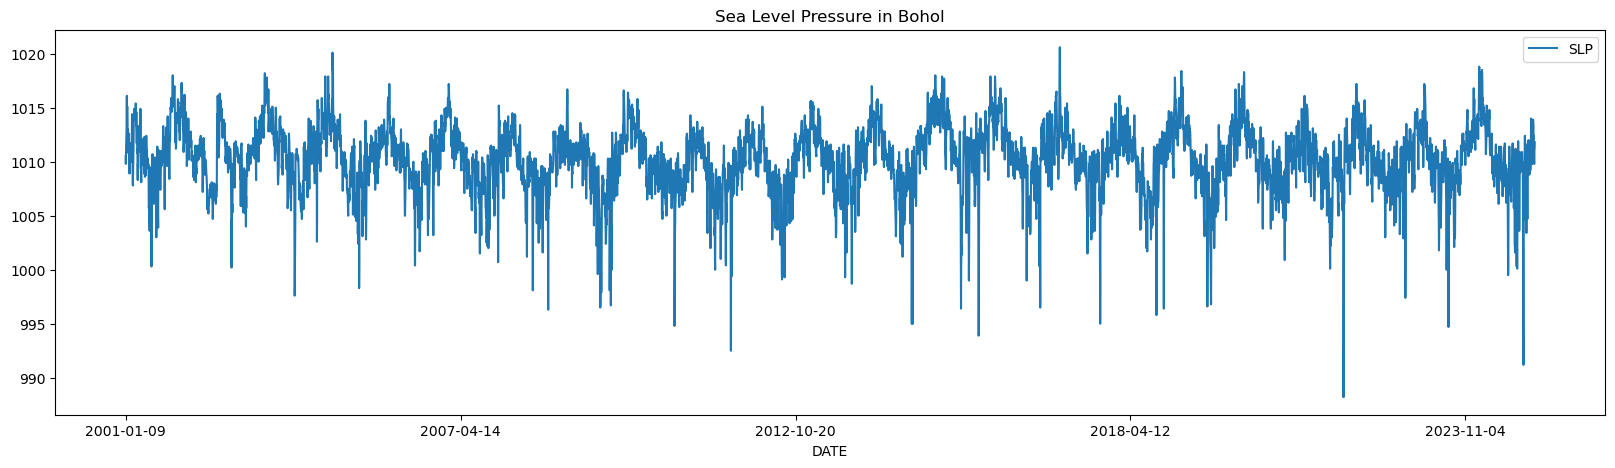

In [4]:
bohol_data.data.plot(x='DATE', y='MAX', title='Max Temperature in Bohol', figsize=(20, 5))
bohol_data.data.plot(x='DATE', y='MIN', title='Min Temperature in Bohol', figsize=(20, 5))
bohol_data.data.plot(x='DATE', y='DEWP', title='Dew Point in Bohol', figsize=(20, 5))
bohol_data.data.plot(x='DATE', y='WDSP', title='Wind Speed in Bohol', figsize=(20, 5))
bohol_data.data.plot(x='DATE', y='MXSPD', title='Max Wind Speed in Bohol', figsize=(20, 5))
bohol_data.data.plot(x='DATE', y='VISIB', title='Visibility in Bohol', figsize=(20, 5))
bohol_data.data.plot(x='DATE', y='PRCP', title='Precipitation in Bohol', figsize=(20, 5))
bohol_data.data.plot(x='DATE', y='SLP', title='Sea Level Pressure in Bohol', figsize=(20, 5))    


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.47831D+00    |proj g|=  1.15779D-01

At iterate    5    f=  2.32130D+00    |proj g|=  4.63206D-02

At iterate   10    f=  2.30248D+00    |proj g|=  1.74708D-02

At iterate   15    f=  2.29933D+00    |proj g|=  2.44038D-03

At iterate   20    f=  2.29926D+00    |proj g|=  1.02833D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     25      1     0     0   1.002D-05   2.299D+00
  F =   2.2992569913277205     

CONVERG

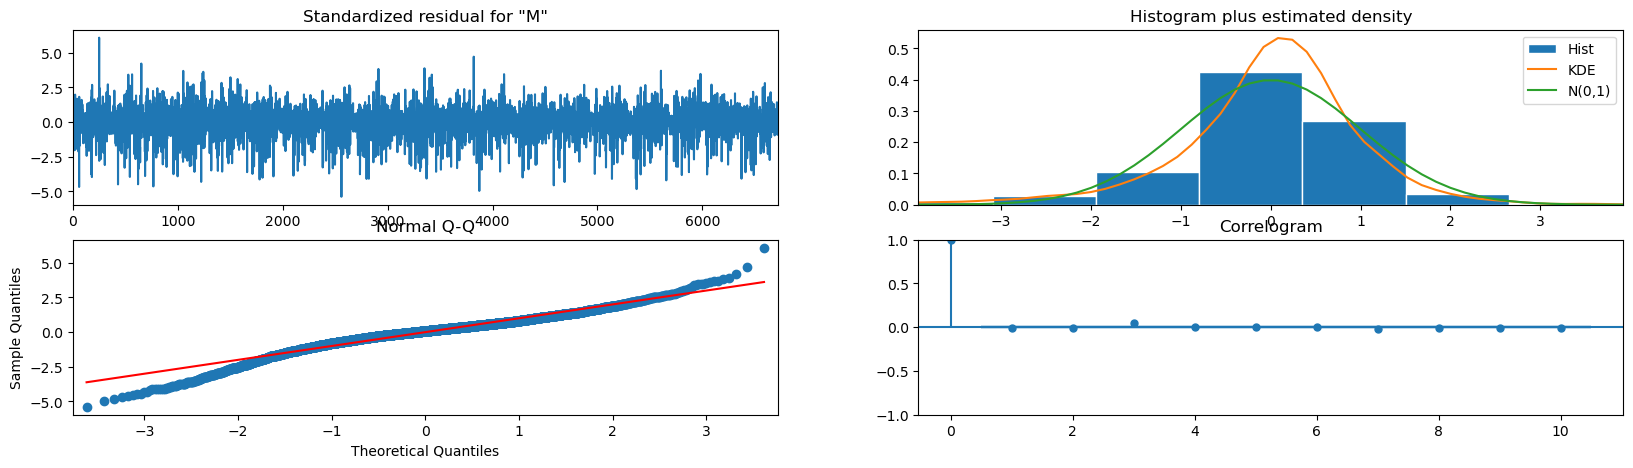

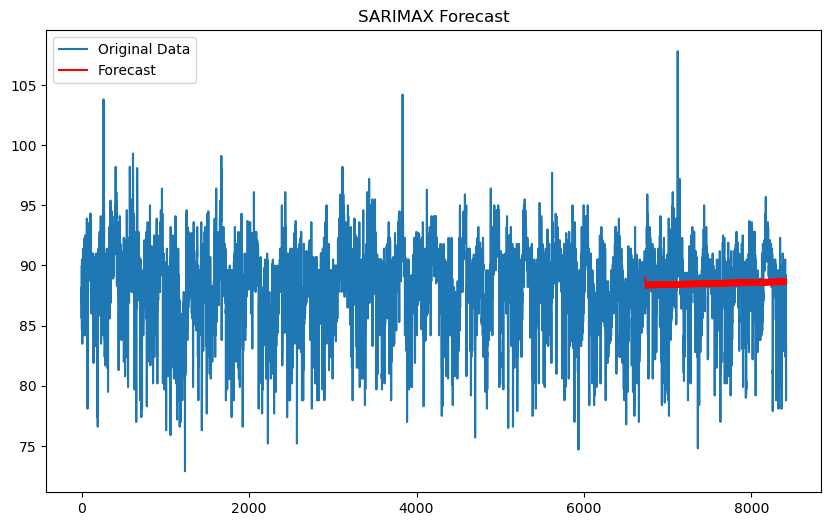

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt

# Assuming bohol_data.data["MAX"] is a pandas Series
max_temp_data = bohol_data.data["MAX"]

# Split data into training and testing sets
train_size = int(0.8 * len(max_temp_data))
max_temp_train = max_temp_data[:train_size]
max_temp_test = max_temp_data[train_size:]

# Define SARIMAX model parameters (adjust these based on your data)
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s) for seasonal component

# Fit the SARIMAX model on the training data
model = SARIMAX(max_temp_train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Optional: Plot diagnostics
model_fit.plot_diagnostics(figsize=(20, 5))
plt.show()

# Forecast future values
forecast_steps = len(max_temp_test)
max_temp_forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(range(len(max_temp_data)), max_temp_data, label="Original Data")
plt.plot(range(train_size, train_size + forecast_steps), max_temp_forecast, label="Forecast", color="red")
plt.legend()
plt.title("SARIMAX Forecast")
plt.show()

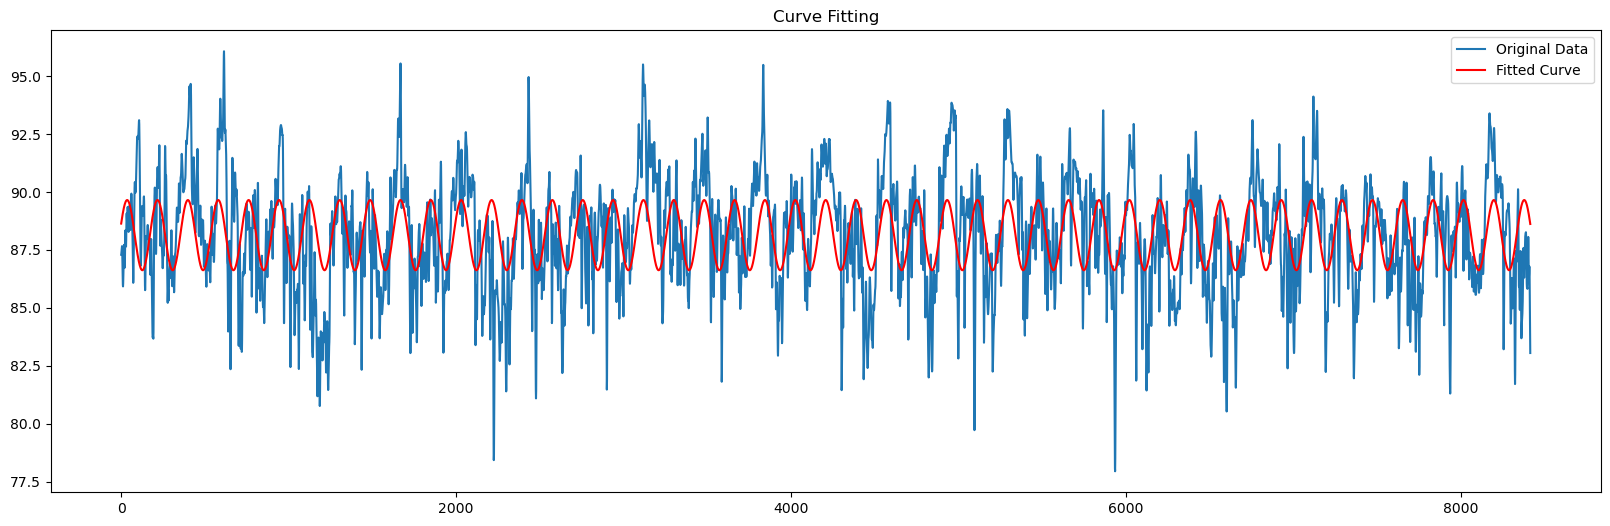

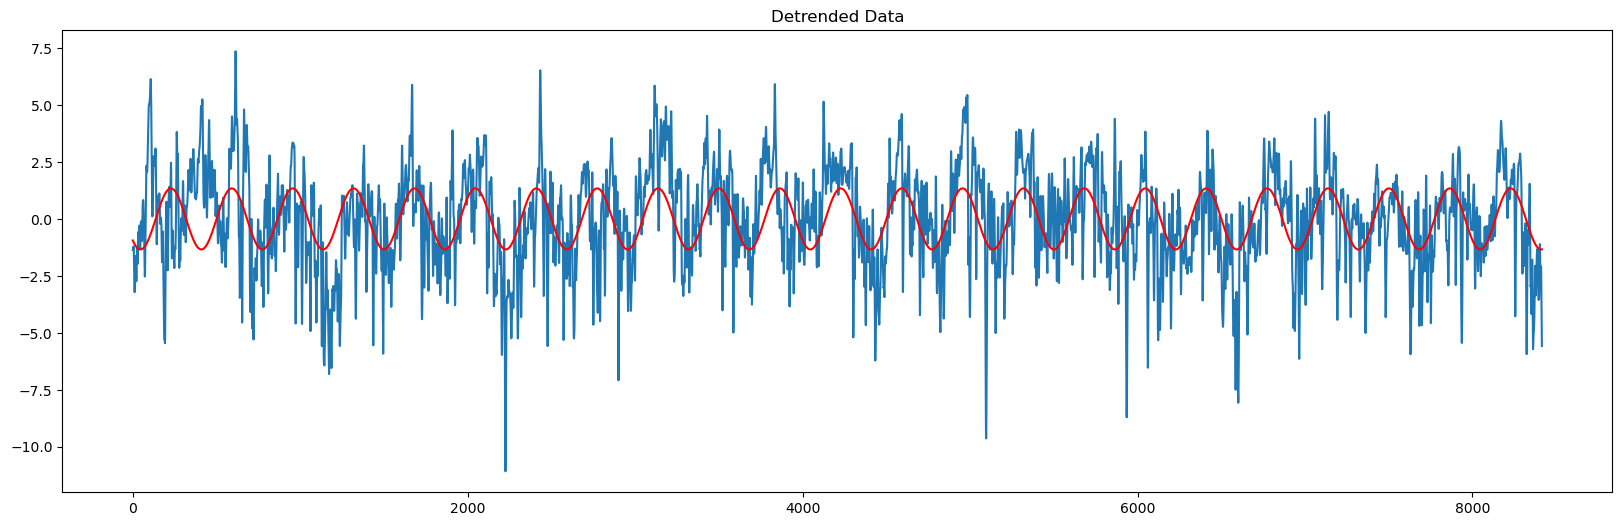

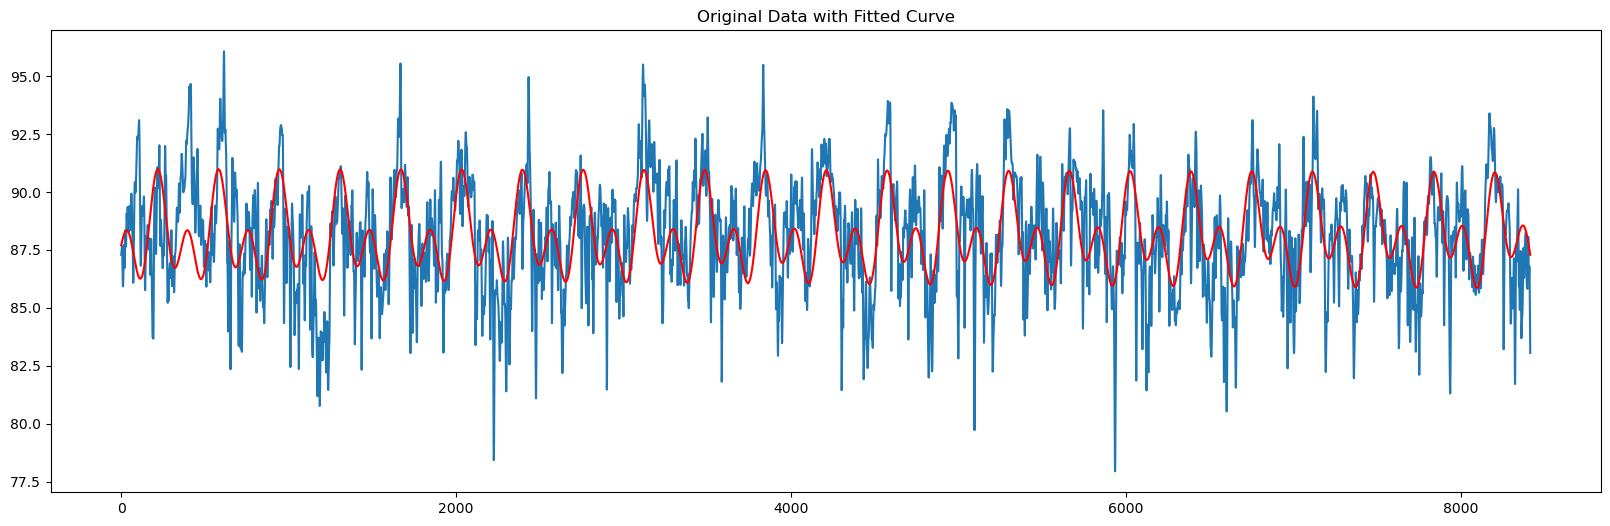

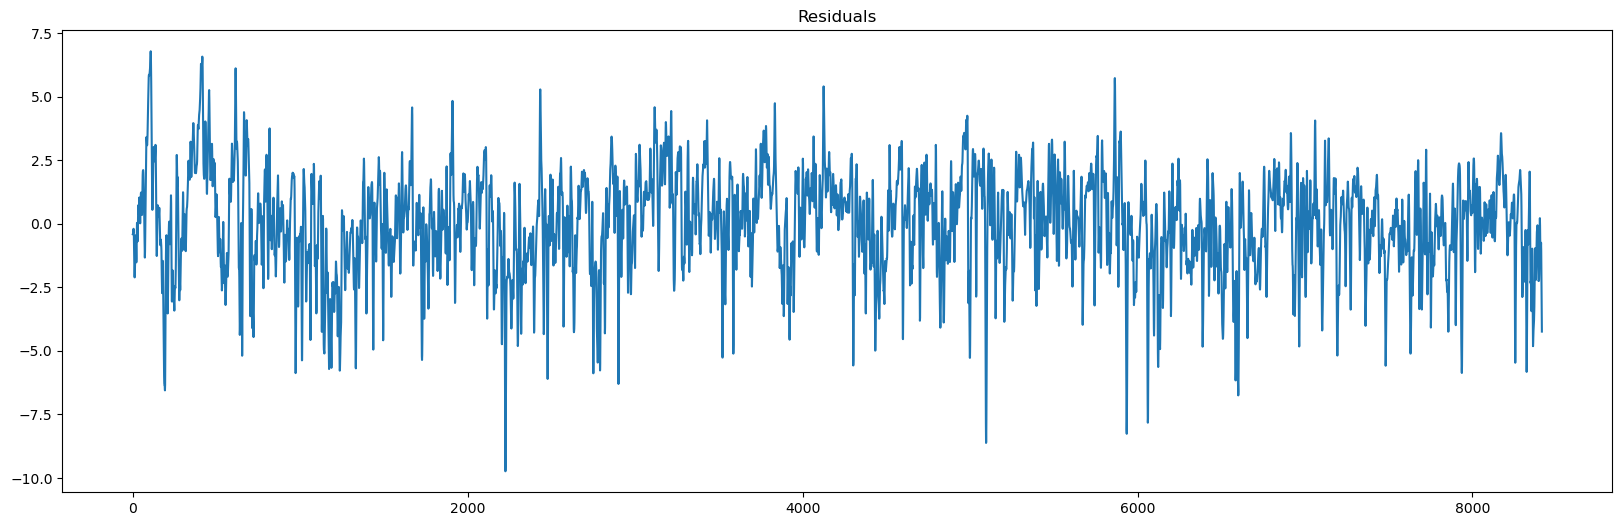

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8415
Model:                 ARIMA(2, 0, 1)   Log Likelihood                6908.381
Date:                Tue, 25 Mar 2025   AIC                         -13806.761
Time:                        20:37:25   BIC                         -13771.572
Sample:                             0   HQIC                        -13794.747
                               - 8415                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.047     -0.030      0.976      -0.094       0.092
ar.L1          1.8325      0.004    446.994      0.000       1.824       1.840
ar.L2         -0.8841      0.004   -211.719      0.0

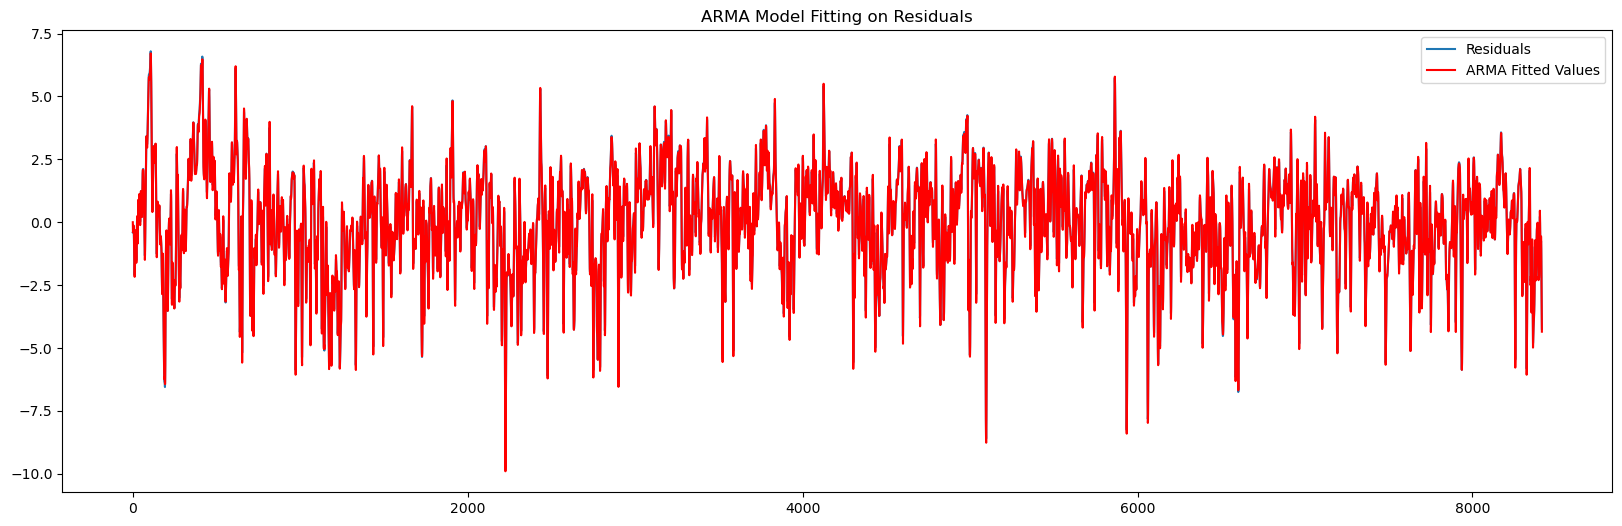

Text(0.5, 1.0, 'Forecast')

/home/jcdutoit/miniconda3/envs/acme/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/jcdutoit/miniconda3/envs/acme/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 1610x176319 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2000x600 with 1 Axes>

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d
from statsmodels.tsa.arima.model import ARIMA


tspace = np.linspace(0, len(max_temp_data), len(max_temp_data))

max_temp_data_sm = gaussian_filter1d(max_temp_data, sigma=2)

def f(t, *args):
    a, b, c, d = args
    return a * np.sin(b * tspace + c) + d

popt, pcov = curve_fit(f, tspace, max_temp_data_sm, p0=[10, 4*np.pi/365, 0, 90])

plt.figure(figsize=(20, 6))
plt.plot(tspace, max_temp_data_sm, label="Original Data")
plt.plot(tspace, f(tspace, *popt), label="Fitted Curve", color="red")
plt.legend()
plt.title("Curve Fitting")
plt.show()

detrended = max_temp_data_sm - f(tspace, *popt)


def f2(t, *args):
    a, b, c, d = args
    return a * np.sin(b * tspace + c) + d

popt2, pcov2 = curve_fit(f2, tspace, detrended, p0=[4, 2*np.pi/365, 0, 0])

plt.figure(figsize=(20, 6))
plt.plot(tspace, detrended, label="Detrended Data")
plt.plot(tspace, f2(tspace, *popt2), label="Fitted Curve", color="red")
plt.title("Detrended Data")
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(tspace, max_temp_data_sm, label="Original Data")
plt.plot(tspace, f(tspace, *popt) + f2(tspace, *popt2), label="Fitted Curve", color="red")
plt.title("Original Data with Fitted Curve")
plt.show()

residuals = max_temp_data_sm - (f(tspace, *popt) + f2(tspace, *popt2))
plt.figure(figsize=(20, 6))
plt.plot(tspace, max_temp_data_sm - (f(tspace, *popt) + f2(tspace, *popt2)))
plt.title("Residuals")
plt.show()

# Fit an ARMA model on the residuals
arma_order = (2, 0, 1)  # (p, q) order for ARMA
arma_model = ARIMA(residuals, order=arma_order)
arma_fit = arma_model.fit()

# Print the summary of the ARMA model
print(arma_fit.summary())

# Plot the residuals and the ARMA model's fitted values
plt.figure(figsize=(20, 6))
plt.plot(tspace, residuals, label="Residuals")
plt.plot(tspace, arma_fit.fittedvalues, label="ARMA Fitted Values", color="red")
plt.legend()
plt.title("ARMA Model Fitting on Residuals")
plt.show()

def model(t):
    return f(t, *popt) + f2(t, *popt2) + arma_fit.forecast(steps=1)[0]


forecast = [model(t) for t in range(len(max_temp_data), len(max_temp_data) + len(max_temp_test))]
plt.figure(figsize=(20, 6))
plt.plot(tspace, max_temp_data_sm, label="Original Data")
plt.plot(range(len(max_temp_data), len(max_temp_data) + len(max_temp_test), 1), forecast, label="Forecast", color="red")
plt.legend()
plt.title("Forecast")


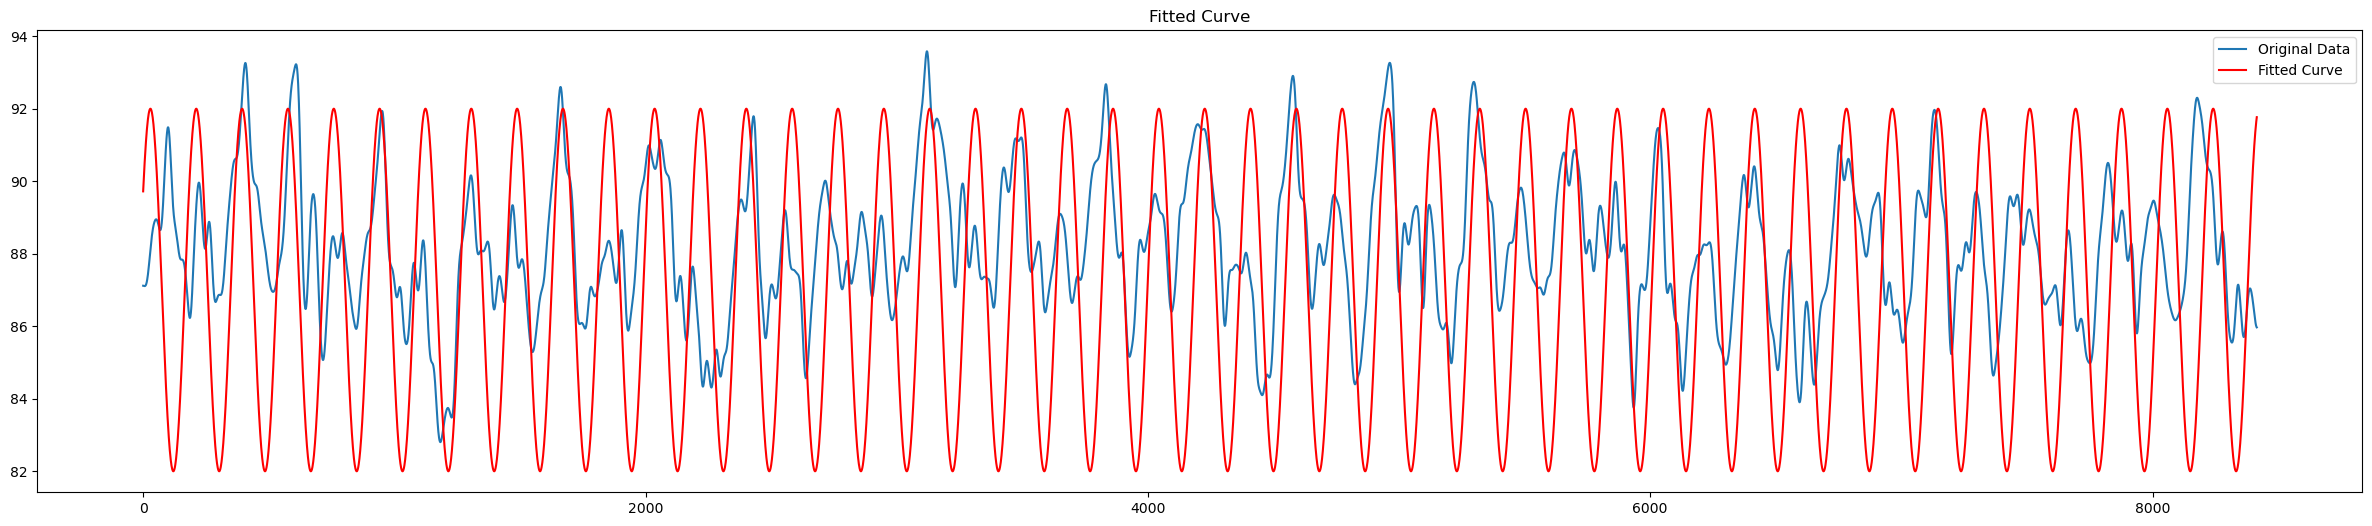

In [46]:
plt.figure(figsize=(30, 6))
plt.plot(tspace, smoothed_max_temp_data, label="Original Data")
# plt.plot(tspace, f(tspace, *popt), label="Fitted Curve", color="red")

def guess(t):
    return 5 * np.sin(4*np.pi / 365 * t + 365) + 87

plt.plot(tspace, guess(tspace), label="Fitted Curve", color="red")
plt.legend()
plt.title("Fitted Curve")
plt.show()